Similarly to 3D bars, we might want to create 3D histograms. These are useful for easily spotting correlation between three independent variables. They can be used to extract information from images in which the third dimension could be the intensity of a channel in the x, y space of the image under analysis.

In this recipe, you will learn how to create 3D histograms.

Getting ready

To recall, a histogram represents the number of occurrences of some value in a particular column—usually called bin. A 3D histogram, then, represents the number of occurrences in a grid. This grid is rectangular, over two variables represented by the data in the two columns.

How to do it...

For this computation we will:

Use NumPy's help, as it has a function for computing the histogram of two variables.

Generate x and y from normal distributions, but with different parameters, to be able to distinguish the correlation in the resulting histogram.

Plot the scatter plot of the same dataset, to demonstrate how different the display of the scatter plot is to the 3D histogram.

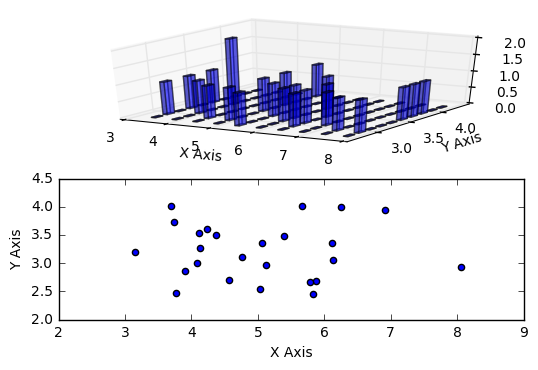

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10

samples = 25

x = np.random.normal(5, 1, samples)
y = np.random.normal(3, .5, samples)

fig = plt.figure()
ax1 = fig.add_subplot(211, projection='3d')

# compute two-dimensional histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=10)

# compute location of the x,y bar positions
elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1]+.25, yedges[:-1]+.25)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)

# make every bar the same width in base
dx = .1 * np.ones_like(zpos)
dy = dx.copy()

# this defines the height of the bar
dz = hist.flatten()

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.4)
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')

# plot the same x,y correlation in scatter plot 
# for comparison
ax2 = fig.add_subplot(212)
ax2.scatter(x, y)
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

plt.show()

How it works...

We prepare a computer histogram using np.histogram2d, which returns our histogram (hist) and x and y bin edges.

Because for the bard3d function we need coordinates in x, y space, we need to compute the common matrix coordinates, and for that we use np.meshgrid that combines x and y positional vectors into a 2D space grid (matrix). This we can use to plot bars in the XY plane locations.

Variables dx and dy represent the width of the base of each bar, and as we want to make this constant, we give it a 0.1 point value for every position in the xy plane.

The value in the Z-axis (dz) is actually our computer histogram (in the variable hist) that represents the count of common x and y samples at a particular bin.

The scatter plot displays the 2D axes that also visualize the correlation between two similar distributions, but with a different set of starting parameters.

Sometimes, 3D gives us more information and better explains what the data is showing. More often, however, 3D visualizations are more confusing than 2D, and it is advisable to think twice before choosing them over 2D.